# PROBLEM STATEMENT

Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the world where they would have to walk several miles to have access to water. The situation worsens for them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly.

If a Machine Learning algorithm can predict which water point may fail in the immediate future, they can divert the maintenance resource towards that point with reasonable advance notice.

Problem statement: To predict the water point may fail in the immediate future or not based on the different features on the given data.

● Id - row id

● Amount_of _water - Amount of water available in the waterpump

● Gps_height - Altitude of the well

● Waterpoint_type - The kind of waterpoint

● Basin_name - Geographic water basin

● Village - Geographic location

● Regionname - Geographic location

● Region_code- Geographic location (coded)

● Wardname- Geographic location(renamed the original location)

● District_code - Geographic location (coded)

● Population – No of people around the well

● Public_meeting – Is there any public meetings were conducted. (If Yes TRUE otherwise False)

● Organization_funding - organization that provides money for that well construction

● Organization_surveyed– organization which has done survey to collect the data

● Scheme_management - Organization operating the water point

● Schemename – scheme name under which water point sanctioned

● Permit - Is the waterpoint has the permission to use

● Company_installed - Organization that installed the pump

● Management - How the waterpoint is managed

● Management_group – Group which manages the water point.

● Extraction_type – Way of extracting the water

● Extraction_type_group - Way of extracting the water

● Extraction_type_class – class of equipment used to extract the water

● Payment - What the water costs type of payment

● Payment_type - What the water costs type of payment

● Water_quality - The quality of the water

● Quality_group - The quality of the water

● Quantity - The quantity of water

● Quantity_group - The quantity of water

● Source - The source of the water

● Source_type - The source of the water

● Source_class - The source of the water

● Waterpoint_type_group - The kind of waterpoint.

● Status- Target variable (1/0 - functional/non-functional)

In [1]:
import numpy as np # to do the neumerical operations on array's
import pandas as pd # to read the csv file into pandas dataframe

In [2]:
train_df=pd.read_csv('/content/train_data.csv')
test_df=pd.read_csv('/content/test_data.csv')

In [3]:
train_df.head().T

,0,1,2,3,4
Id,56421,21324,74,74038,29929
Amount_of_water,0.0,500.0,0.0,0.0,0.0
Gps_height,1555,857,0,0,0
Waterpoint_type,hand pump,communal standpipe multiple,communal standpipe,other,hand pump
Basin_name,basin3,basin7,basin1,basin5,basin4
Village,village8556,village7372,village9460,village13878,village5192
Regionname,region4,region5,region6,region13,region6
Region_code,15,10,17,18,14
Wardname,ward500,ward1800,ward883,ward1505,ward942
District_code,3,5,3,7,4


In [4]:
train_df.tail().T

,44063,44064,44065,44066,44067
Id,33555,17775,34200,17012,28533
Amount_of_water,0.0,0.0,0.0,200.0,0.0
Gps_height,0,618,1582,629,1512
Waterpoint_type,improved spring,hand pump,communal standpipe,communal standpipe,hand pump
Basin_name,basin5,basin8,basin7,basin6,basin1
Village,village16282,village10061,village9791,village12243,village2454
Regionname,region13,region5,region12,region15,region7
Region_code,18,10,11,3,13
Wardname,ward1422,ward2060,ward1897,ward1248,ward1948
District_code,2,1,4,3,4


In [5]:
test_df.head().T

,0,1,2,3,4
Id,31547,34980,54744,20884,42440
Amount_of_water,0.0,0.0,500.0,0.0,0.0
Gps_height,1018,356,265,1203,0
Waterpoint_type,hand pump,hand pump,hand pump,communal standpipe multiple,communal standpipe
Basin_name,basin2,basin8,basin7,basin5,basin2
Village,village4319,village2412,village19173,village1692,village17574
Regionname,region5,region5,region2,region18,region19
Region_code,10,10,5,20,12
Wardname,ward1777,ward493,ward1546,ward643,ward1356
District_code,4,1,3,6,3


In [6]:
test_df.tail().T

,11010,11011,11012,11013,11014
Id,50818,58478,51919,4475,35884
Amount_of_water,0.0,0.0,0.0,0.0,0.0
Gps_height,0,1408,0,0,233
Waterpoint_type,communal standpipe,communal standpipe,communal standpipe,communal standpipe,hand pump
Basin_name,basin1,basin2,basin7,basin4,basin8
Village,village18251,village2038,village17251,village13480,village15282
Regionname,region11,region12,region19,region8,region16
Region_code,1,11,12,14,80
Wardname,ward1020,ward1796,ward1342,ward1311,ward2089
District_code,1,5,2,1,13


In [7]:
train_df.shape

(44068, 34)

In [8]:
test_df.shape

(11015, 33)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpoint_type        44068 non-null  object 
 4   Basin_name             44068 non-null  object 
 5   Village                44068 non-null  object 
 6   Regionname             44068 non-null  object 
 7   Region_code            44068 non-null  int64  
 8   Wardname               44068 non-null  object 
 9   District_code          44068 non-null  int64  
 10  Population             44068 non-null  int64  
 11  Public_meeting         41543 non-null  object 
 12  Organization_funding   41468 non-null  object 
 13  Organization_surveyed  44068 non-null  object 
 14  Scheme_management      41138 non-null  object 
 15  Sc

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int64  
 1   Amount_of_water        11015 non-null  float64
 2   Gps_height             11015 non-null  int64  
 3   Waterpoint_type        11015 non-null  object 
 4   Basin_name             11015 non-null  object 
 5   Village                11015 non-null  object 
 6   Regionname             11015 non-null  object 
 7   Region_code            11015 non-null  int64  
 8   Wardname               11015 non-null  object 
 9   District_code          11015 non-null  int64  
 10  Population             11015 non-null  int64  
 11  Public_meeting         10362 non-null  object 
 12  Organization_funding   11015 non-null  object 
 13  Organization_surveyed  11015 non-null  object 
 14  Scheme_management      10291 non-null  object 
 15  Sc

In [11]:
## used to disply the summary statistics of the train dataset

train_df.describe()  

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,37092.516384,329.781607,674.305460,15.224539,5.664382,179.780181,0.585640
std,21490.884249,3127.604462,698.062813,17.566722,9.670612,473.609701,0.492617
min,0.000000,0.000000,-63.000000,1.000000,0.000000,0.000000,0.000000
25%,18363.250000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37021.500000,0.000000,370.000000,12.000000,3.000000,25.000000,1.000000
75%,55685.250000,20.000000,1327.000000,17.000000,5.000000,211.000000,1.000000
max,74242.000000,350000.000000,2628.000000,99.000000,80.000000,30500.000000,1.000000


In [12]:
## ## used to disply the summary statistics of the test dataset

test_df.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population
count,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000
mean,37191.448933,288.939537,660.207263,15.529460,5.832410,182.313572
std,21347.415727,2804.815011,689.647957,18.129926,10.026108,477.392955
min,2.000000,0.000000,-90.000000,1.000000,0.000000,0.000000
25%,19039.000000,0.000000,0.000000,5.000000,2.000000,0.000000
50%,37120.000000,0.000000,361.000000,12.000000,3.000000,25.000000
75%,55503.500000,20.000000,1317.000000,17.000000,5.000000,209.500000
max,74247.000000,200000.000000,2569.000000,99.000000,80.000000,11463.000000


In [13]:
train_df.columns   

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [14]:
test_df.columns

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group'],
      dtype='object')

In [15]:
train_df.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

In [16]:
train_df['Public_meeting'].fillna(train_df['Public_meeting'].mode()[0], inplace=True)
train_df['Organization_funding'].fillna(train_df['Organization_funding'].mode()[0], inplace=True)
train_df['Scheme_management'].fillna(train_df['Scheme_management'].mode()[0], inplace=True)
train_df['SchemeName'].fillna(train_df['SchemeName'].mode()[0], inplace=True)
train_df['Permit'].fillna(train_df['Permit'].mode()[0], inplace=True)
train_df['Company_installed'].fillna(train_df['Company_installed'].mode()[0], inplace=True)

In [17]:
train_df.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [18]:
test_df.isnull().sum()

Id                          0
Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Organization_surveyed       0
Scheme_management         724
SchemeName               5211
Permit                    529
Company_installed           0
Management                  0
Management_group            0
Extraction_type             0
Extraction_type_group       0
Extraction_type_class       0
Payment                     0
Payment_type                0
Water_quality               0
Quality_group               0
Quantity                    0
Quantity_group              0
Source                      0
Source_type                 0
Source_class                0
Waterpoint_type_group       0
dtype: int

In [19]:
test_df['Public_meeting'].fillna(test_df['Public_meeting'].mode()[0], inplace=True)
test_df['Scheme_management'].fillna(test_df['Scheme_management'].mode()[0], inplace=True)
test_df['SchemeName'].fillna(test_df['SchemeName'].mode()[0], inplace=True)
test_df['Permit'].fillna(test_df['Permit'].mode()[0], inplace=True)

In [20]:
test_df.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

In [21]:
train_df.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [22]:
test_df.nunique()

Id                       11015
Amount_of_water             67
Gps_height                2031
Waterpoint_type              6
Basin_name                   9
Village                   6726
Regionname                  21
Region_code                 26
Wardname                  1879
District_code               20
Population                 536
Public_meeting               2
Organization_funding      1216
Organization_surveyed        1
Scheme_management           11
SchemeName                1578
Permit                       2
Company_installed         1233
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [23]:
for i in test_df.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(test_df[i].value_counts())
    print("<-------------------------------------------------->")
    

<-------------------------------------------------->
Id
31547    1
22723    1
56209    1
55326    1
36104    1
        ..
59576    1
63080    1
53525    1
36109    1
35884    1
Name: Id, Length: 11015, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Amount_of_water
0.0       7801
500.0      543
50.0       474
20.0       287
1000.0     257
          ... 
5500.0       1
350.0        1
900.0        1
3500.0       1
1.0          1
Name: Amount_of_water, Length: 67, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Gps_height
 0       3786
 1290      15
-5         15
 1330      15
 12        14
         ... 
 2457       1
 578        1
 587        1
 864        1
 919        1
Name: Gps_height, Length: 2031, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Waterpoint_type
communal sta

In [24]:
for i in train_df.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(train_df[i].value_counts())
    print("<-------------------------------------------------->")
    

<-------------------------------------------------->
Id
56421    1
14366    1
3042     1
13649    1
19879    1
        ..
63855    1
16388    1
20797    1
38906    1
28533    1
Name: Id, Length: 44068, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Amount_of_water
0.0         30790
500.0        2285
50.0         1891
1000.0       1145
20.0         1100
            ...  
53.0            1
70000.0         1
138000.0        1
550.0           1
1400.0          1
Name: Amount_of_water, Length: 91, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
Gps_height
 0       14889
-15         47
-20         44
-16         44
-13         42
         ...  
 2263        1
 2091        1
 2450        1
 2250        1
-55          1
Name: Gps_height, Length: 2389, dtype: int64
<-------------------------------------------------->
<------------------------------------

## visualizations


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

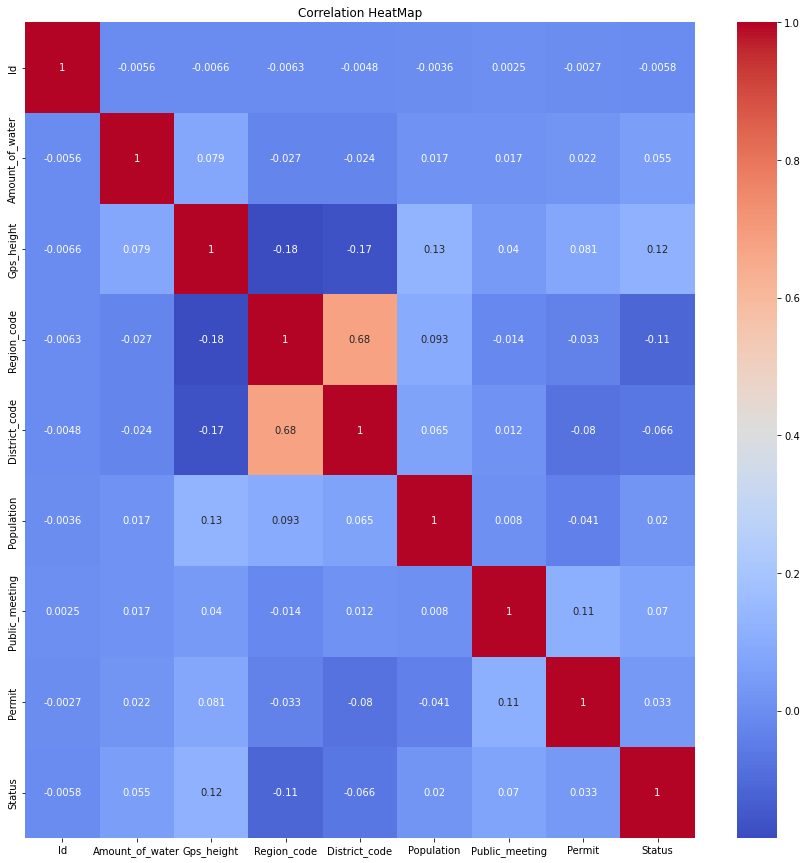

In [26]:
plt.subplots(figsize=(15,15))

plt.title("Correlation HeatMap")
sns.heatmap(train_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

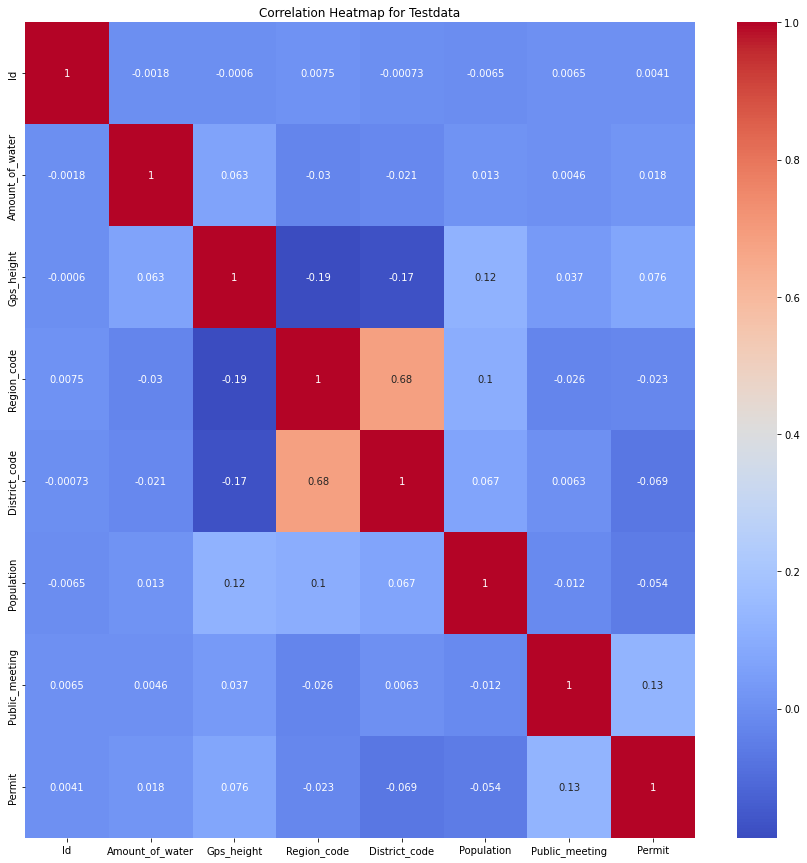

In [27]:
plt.subplots(figsize=(15,15))
plt.title("Correlation Heatmap for Testdata")
sns.heatmap(test_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [28]:
# Count number of functional and non- functional cases
status = train_df['Status'].value_counts()
print(status)

1    25808
0    18260
Name: Status, dtype: int64


In [29]:
status = train_df["Status"].value_counts(normalize = True)*100
print(status)

1    58.564037
0    41.435963
Name: Status, dtype: float64


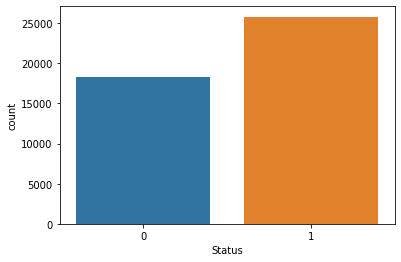

In [30]:
sns.countplot(x = "Status", data = train_df)
plt.show()

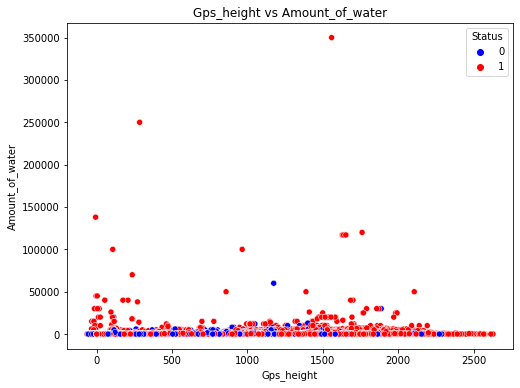

In [31]:

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Gps_height", y="Amount_of_water", hue="Status", data=train_df, palette=['blue', 'red'])
plt.title('Gps_height vs Amount_of_water')
plt.xlabel('Gps_height')
plt.ylabel('Amount_of_water')
plt.show()

In [32]:
## plotting the boxplots



<Axes: >

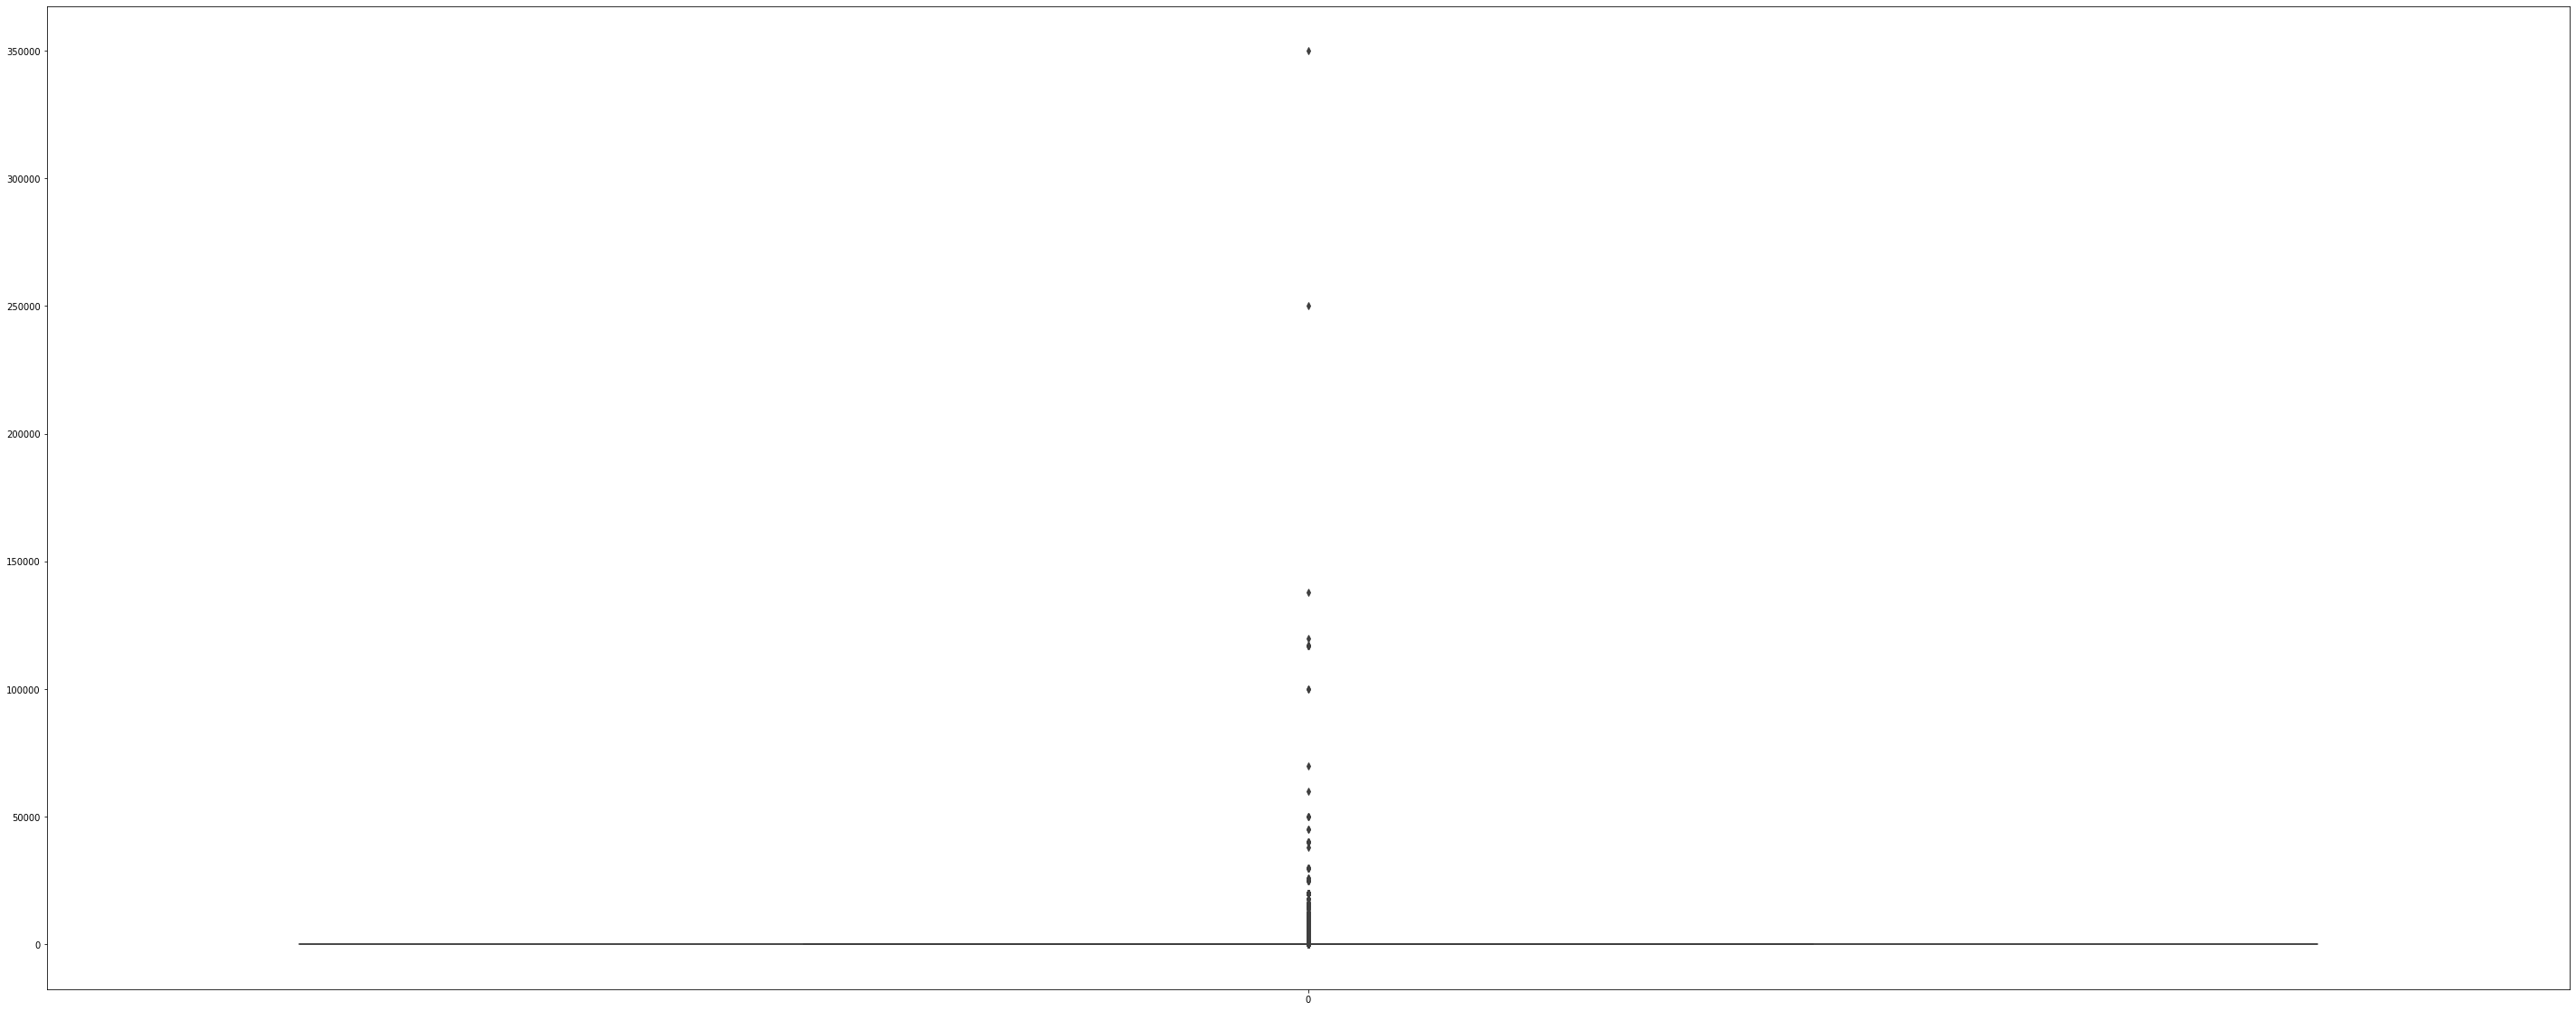

In [33]:
plt.figure(figsize= (50,20))
sns.boxplot(train_df['Amount_of_water'])

In [34]:
train_df.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting              bool
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                      bool
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [35]:
categorical_columns=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname','Public_meeting', 
                     'Organization_funding','Organization_surveyed', 'Scheme_management', 'SchemeName', 
                     'Permit','Company_installed', 'Management', 'Management_group','Extraction_type', 
                     'Extraction_type_group', 'Extraction_type_class', 'Payment', 'Payment_type', 
                     'Water_quality', 'Quality_group', 'Quantity','Quantity_group', 'Source',
                     'Source_type', 'Source_class','Waterpoint_type_group',]

In [36]:
for i in categorical_columns:
  train_df[i]=train_df[i].astype('category').cat.codes

In [37]:
train_df.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type             int8
Basin_name                  int8
Village                    int16
Regionname                  int8
Region_code                int64
Wardname                   int16
District_code              int64
Population                 int64
Public_meeting              int8
Organization_funding       int16
Organization_surveyed       int8
Scheme_management           int8
SchemeName                 int16
Permit                      int8
Company_installed          int16
Management                  int8
Management_group            int8
Extraction_type             int8
Extraction_type_group       int8
Extraction_type_class       int8
Payment                     int8
Payment_type                int8
Water_quality               int8
Quality_group               int8
Quantity                    int8
Quantity_group              int8
Source                      int8
Source_typ

In [38]:
train_df.head().T

,0,1,2,3,4
Id,56421.0,21324.0,74.0,74038.0,29929.0
Amount_of_water,0.0,500.0,0.0,0.0,0.0
Gps_height,1555.0,857.0,0.0,0.0,0.0
Waterpoint_type,4.0,2.0,1.0,6.0,4.0
Basin_name,2.0,6.0,0.0,4.0,3.0
Village,15081.0,13964.0,15958.0,3668.0,11925.0
Regionname,15.0,16.0,17.0,4.0,17.0
Region_code,15.0,10.0,17.0,18.0,14.0
Wardname,1536.0,889.0,1958.0,563.0,2024.0
District_code,3.0,5.0,3.0,7.0,4.0


In [39]:
categorical_list=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname',
                  'Public_meeting', 'Organization_funding','Organization_surveyed', 
                  'Scheme_management', 'SchemeName', 'Permit','Company_installed', 
                  'Management', 'Management_group','Extraction_type', 'Extraction_type_group',
                  'Extraction_type_class', 'Payment', 'Payment_type', 'Water_quality', 
                  'Quality_group', 'Quantity','Quantity_group', 'Source', 'Source_type',
                  'Source_class','Waterpoint_type_group',]

In [40]:
for i in categorical_list:
  test_df[i]=test_df[i].astype('category').cat.codes

In [41]:
test_df.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type             int8
Basin_name                  int8
Village                    int16
Regionname                  int8
Region_code                int64
Wardname                   int16
District_code              int64
Population                 int64
Public_meeting              int8
Organization_funding       int16
Organization_surveyed       int8
Scheme_management           int8
SchemeName                 int16
Permit                      int8
Company_installed          int16
Management                  int8
Management_group            int8
Extraction_type             int8
Extraction_type_group       int8
Extraction_type_class       int8
Payment                     int8
Payment_type                int8
Water_quality               int8
Quality_group               int8
Quantity                    int8
Quantity_group              int8
Source                      int8
Source_typ

In [42]:
column_stats = train_df['Amount_of_water'].describe()
print(column_stats)

count     44068.000000
mean        329.781607
std        3127.604462
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: Amount_of_water, dtype: float64


In [43]:
column_stats = test_df['Amount_of_water'].describe()
print(column_stats)

count     11015.000000
mean        288.939537
std        2804.815011
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      200000.000000
Name: Amount_of_water, dtype: float64


In [44]:
train_df['Amount_of_water'] = np.where(train_df['Amount_of_water'] > 20, np.sqrt(train_df['Amount_of_water']), train_df['Amount_of_water'])

In [45]:
column_stats = train_df['Amount_of_water'].describe()
print(column_stats)

count    44068.000000
mean         7.127256
std         17.032362
min          0.000000
25%          0.000000
50%          0.000000
75%          7.071068
max        591.607978
Name: Amount_of_water, dtype: float64


In [46]:
test_df['Amount_of_water'] = np.where(test_df['Amount_of_water'] > 20, np.sqrt(test_df['Amount_of_water']), test_df['Amount_of_water'])

In [47]:
column_stats = test_df['Amount_of_water'].describe()
print(column_stats)

count    11015.000000
mean         6.676954
std         15.999851
min          0.000000
25%          0.000000
50%          0.000000
75%          7.071068
max        447.213595
Name: Amount_of_water, dtype: float64


In [48]:
train_df=train_df.drop(['Id'],axis=1)

In [49]:
test_df=test_df.drop(['Id'],axis=1)

In [50]:
# Split the dataset into training and testing sets
# Use 70% of the data for training and 30% for testing
train_data = train_df.sample(frac=0.7, random_state=42)
test_data = train_df.drop(train_data.index)


In [51]:

# Separate the features and target variables
X_train = train_data.drop('Status', axis=1)
y_train = train_data['Status']
X_test = test_data.drop('Status', axis=1)
y_test = test_data['Status']

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30848, 32)
(30848,)
(13220, 32)
(13220,)


In [53]:
## Model building for rfc without using sklearn library

import numpy as np
from collections import Counter    ## Counter class from the collections module is a useful tool for counting the frequency of elements in a list or any other iterable.

class Node:
  ##the feature, threshold, left, and right parameters define an internal node, and the value parameter defines a leaf node.
  ## The * before the value parameter indicates that it is a keyword-only argument, which means it can only be passed using its name.
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None): ## init is a method used to initialise the obj of a class.
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
 ## is_leaf_node is a member function of a class.is_leaf_node method is used to check if a particular node is a leaf node or not.
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

##fit is a member function of a class. x--i/pfeatures, y--target var
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

##The _grow_tree method is a recursive method that creates the decision tree by splitting the input data at each node based on the selected feature and threshold
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)     ##np.random.choice() is a func from the NumPy lib that randomly selects a specified no.of items

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


##_best_split that takes in an input dataset X, a target variable y, and a set of feature indices feat_idxs. 
##The purpose of this method is to find the best split point among all the candidate features and thresholds for a given set of features,
  
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:  ##feat_idxs is a numerical position of each of these feature in dataset
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


### method _information_gain that takes in a target variable y, a feature column X_column, and a threshold value.
## The purpose of this method is to calculate the information gain of a given split point based on the entropy of the parent node and the weighted average entropy of the child nodes.

  
    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        ##the method splits the data into left and right child nodes based on the specified threshold. 
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        ##Finally, the method calculates the information gain as the difference between the parent entropy and the child entropy.  
        information_gain = parent_entropy - child_entropy
        return information_gain

## The method first uses NumPy's argwhere function to find the indices of the samples in X_column that are less than or equal to the split threshold.
## The flatten method is then used to convert the resulting 2D array of indices to a 1D array.
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)  ##bincount function to count the number of occurrences of each class label in y.
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [54]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):   ## initializes the hyperparameters of the random forest classifier
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_features
        self.trees = []

    def fit(self, X, y):   ##  This method is used to train the random forest classifier. It creates a list of decision trees by calling the DecisionTree class, 
                                #then fits each decision tree on a bootstrapped sample of the training data.
                              # The number of trees to be created is defined by the n_trees hyperparameter
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):  ## It takes in the training data X and corresponding labels y, and returns a bootstrapped sample of the same size as the original data
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):  ## takes in an array of labels y and returns the most commonly occurring label.
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):  ##used to make predictions on new data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
rf = RandomForest(n_trees=100,max_depth=2,n_features=2)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5)

In [57]:
y_pred = rf.predict(X_train)

In [58]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [59]:
## checking accuracy_score

accuracy = accuracy_score(y_train.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9972769709543569


In [60]:
rf.fit(X_test, y_test)

RandomForestClassifier(max_features=5)

In [61]:
y_pred = rf.predict(X_test)

In [62]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [63]:
## checking accuracy_score

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9984871406959153


In [64]:
## CONFUSION METRICS:
# if the cost of false positives is high (e.g., offering a promotion to a customer who is likely to churn), precision may be the most important metric to optimize.
#  Conversely, if the cost of false negatives is high (e.g., losing a valuable customer), recall may be the most important metric to optimize.

def confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix for a binary classifier.

    Args:
    y_true: a numpy array of the true class labels (0 or 1)
    y_pred: a numpy array of the predicted class labels (0 or 1)

    Returns:
    confusion_matrix: a 2x2 numpy array containing the counts of true positives, false positives,
                      true negatives, and false negatives, in that order
    """
    true_positives = ((y_true == 1) & (y_pred == 1)).sum()  # actually positive and predicted to be positive.
    false_positives = ((y_true == 0) & (y_pred == 1)).sum()  #  actually negative but predicted to be positive.
    true_negatives = ((y_true == 0) & (y_pred == 0)).sum()  ## actually negative and predicted to be negative.
    false_negatives = ((y_true == 1) & (y_pred == 0)).sum() ## actually positive but predicted to be negative.

    confusion_matrix = np.array([[true_positives, false_positives], [false_negatives, true_negatives]])

    return confusion_matrix

In [66]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([1, 0, 1])
rf.fit(X, y)

# make predictions
y_pred = rf.predict(X)

# compute the confusion matrix
confusion_matrix = confusion_matrix(y, y_pred)

In [137]:
print(confusion_matrix)

[[2 0]
 [0 1]]


In [ ]:
import itertools

def grid_search(param_grid, model, X_train, y_train, X_test, y_test):
    best_score = None
    best_params = None
    
    # Generate all possible combinations of hyperparameters
    all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]
    
    # Loop over all parameter combinations and fit the model
    for params in all_params:
        model.set_params(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        # Update best score and parameters if this model is better
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
    
    return best_score, best_params


In [68]:
#  Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [69]:
#  Create an RFC model
rfc = RandomForestClassifier()


In [70]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [71]:
# Step 5: Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.99


In [72]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [73]:
# Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.97
